In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_1 = pd.read_csv("heat_data_fig_1_python.csv").set_index("Country")
df_2 = pd.read_csv("heat_data_fig_2_python.csv").set_index("Country")

In [ ]:
df_2

In [37]:
#df_1.replace(0, np.nan, inplace=True)
#df_2.replace(0, np.nan, inplace=True)
df_1.loc["Canada"].values
labels_1 = df_1.columns
labels_2 = df_2.columns
df_1

,Gas,Oil,Other fossils,Heat pumps,Direct renewables,District heat,Electricity
Country,,,,,,,
Canada,1326,82,53.0,NaN,170,NaN,381
Denmark,26,7,NaN,10.0,43,69.0,6
France,757,225,1.0,183.0,277,86.0,235
Germany,1263,624,13.0,NaN,465,208.0,297
Scotland,104,12,3.0,NaN,6,NaN,14
United Kingdom,1361,199,20.0,NaN,96,NaN,252
United States,5112,1038,NaN,NaN,826,NaN,1326


In [38]:
for country in df_1.index:
    plt.figure(figsize=(14,14))
    colors = sns.color_palette("tab10")
    plt.pie(df_1.loc[country], labels=labels_1, colors=colors, startangle=90, autopct='%.0f%%', textprops={'fontsize': 20})
    plt.title(f'Heating fuel source baseline: {country}', fontdict={'fontsize': 20})
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.savefig(f"Exported/{country}_figure_1")
    plt.show()

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1008x1008 with 1 Axes>

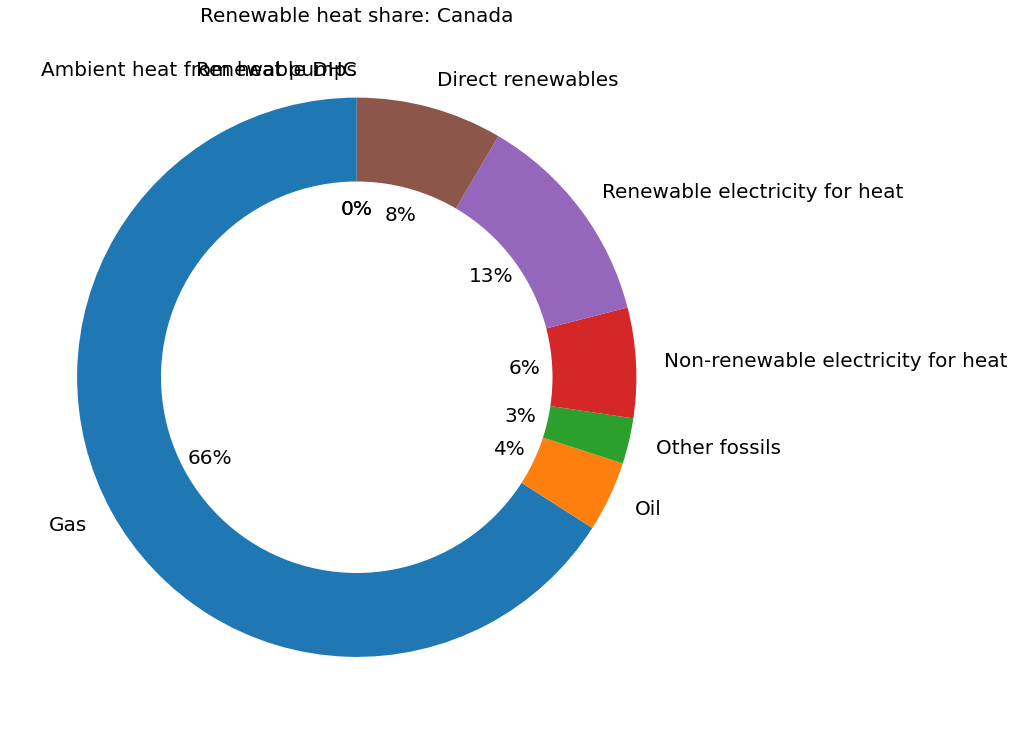

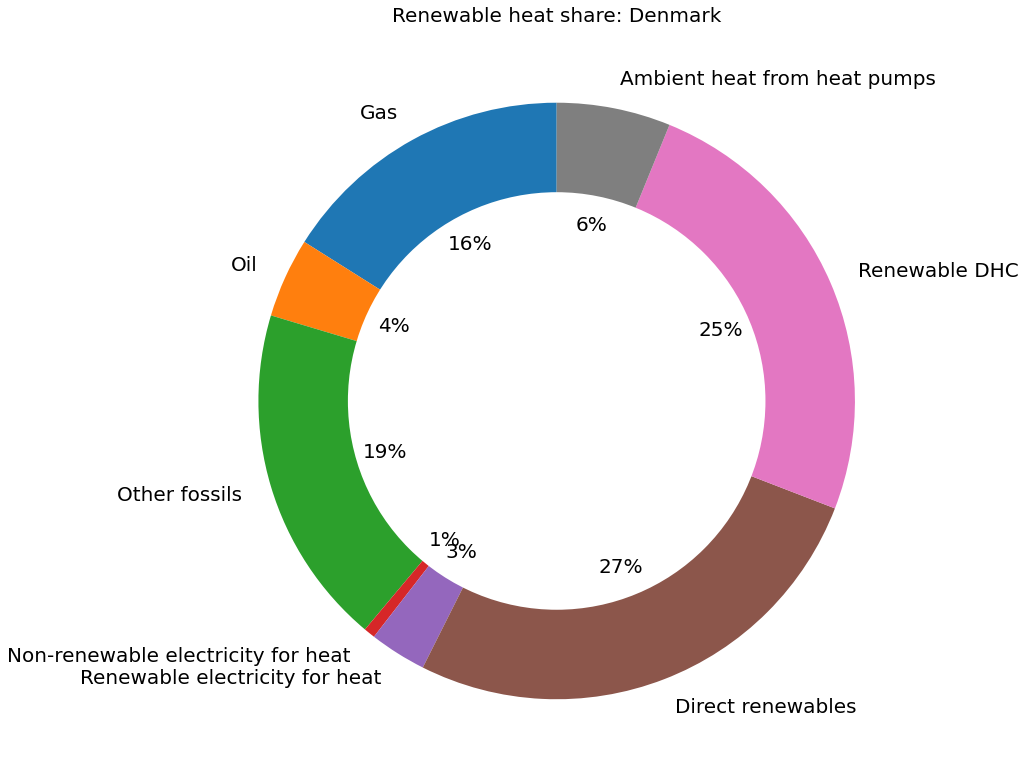

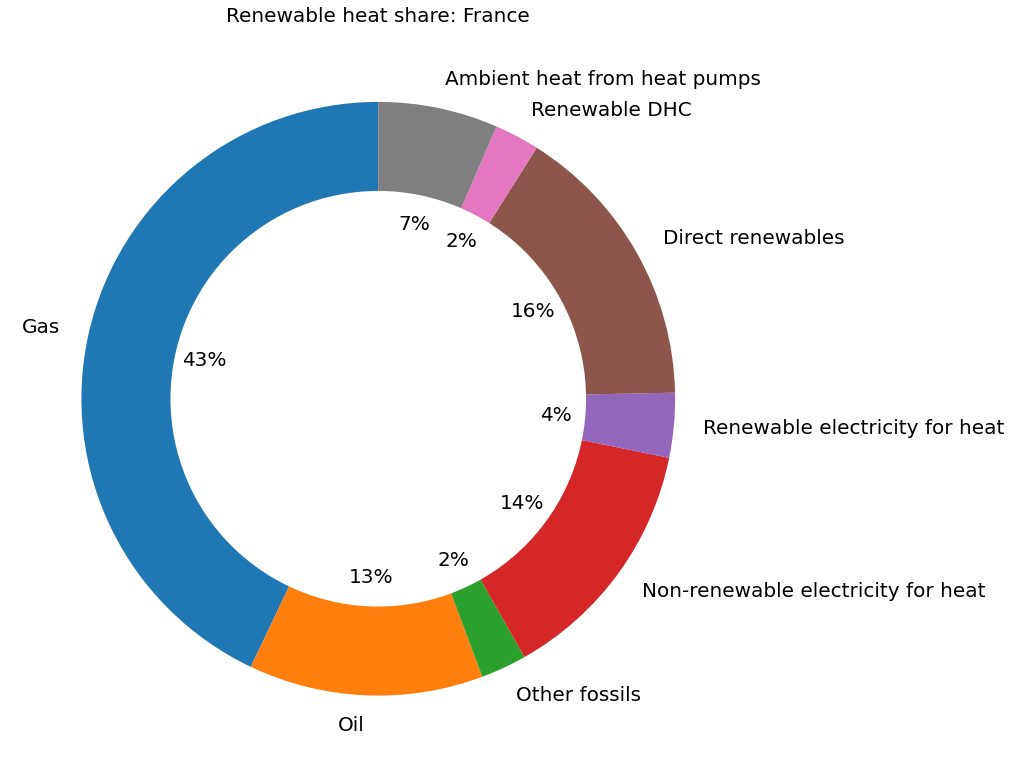

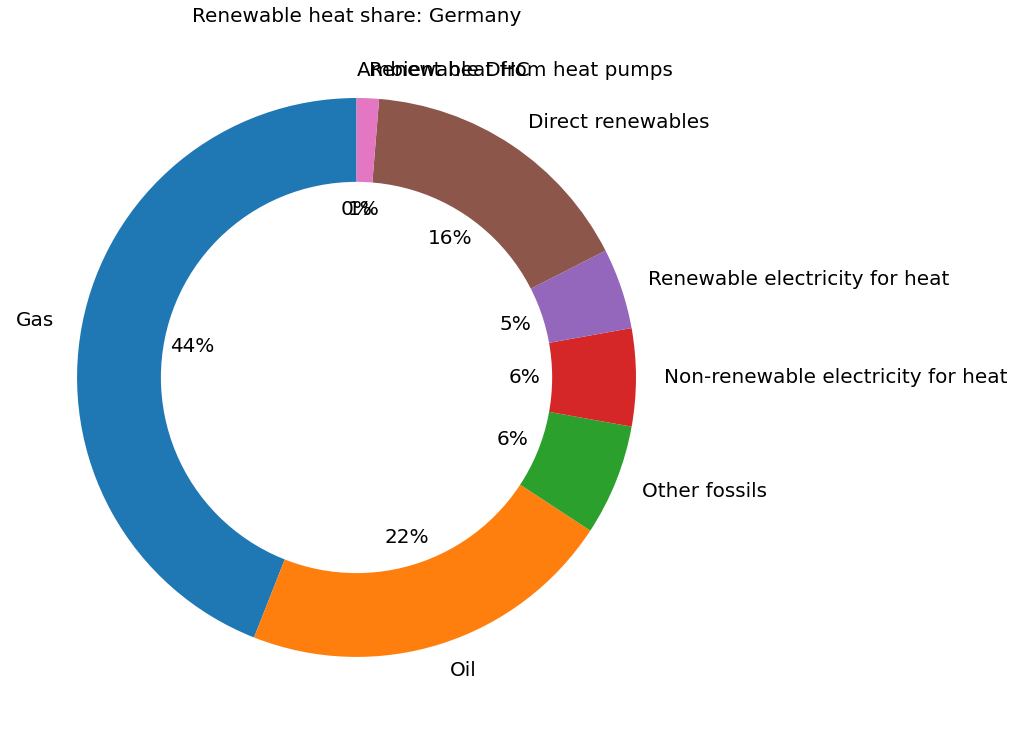

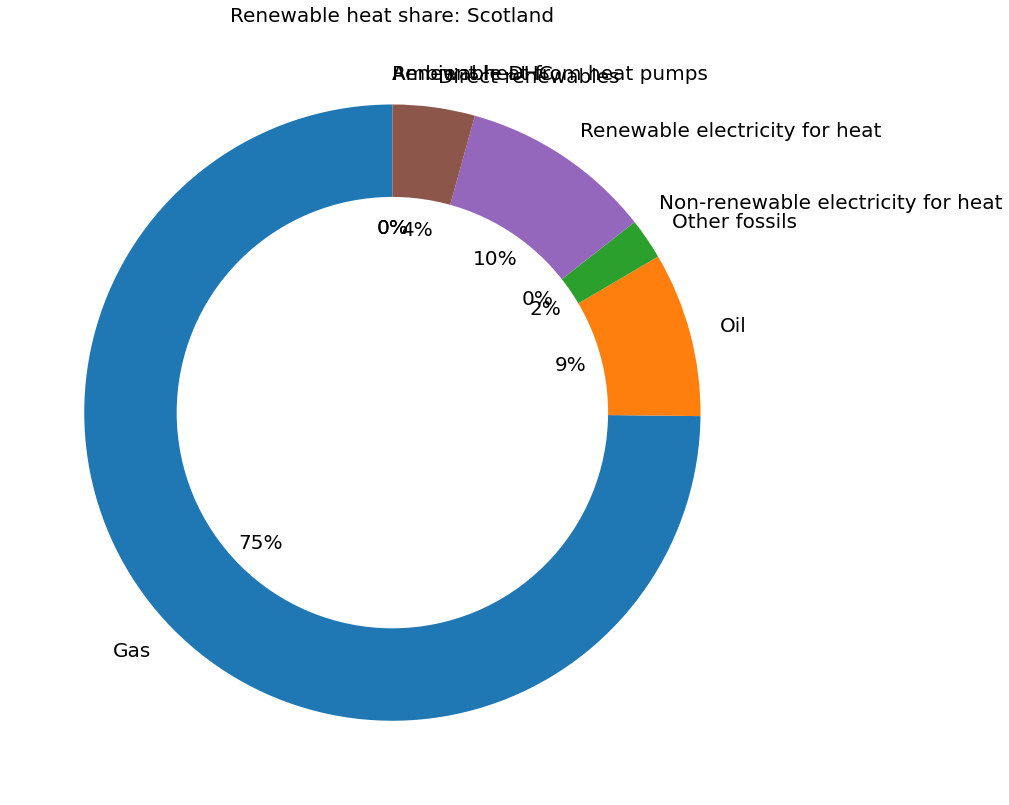

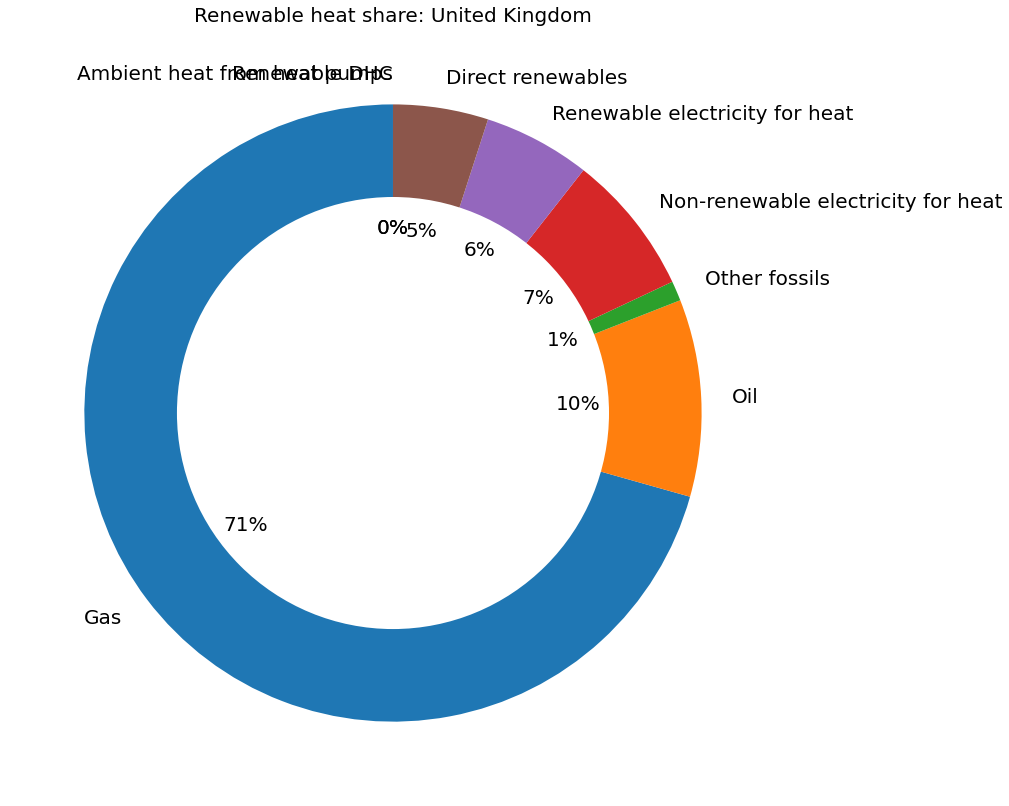

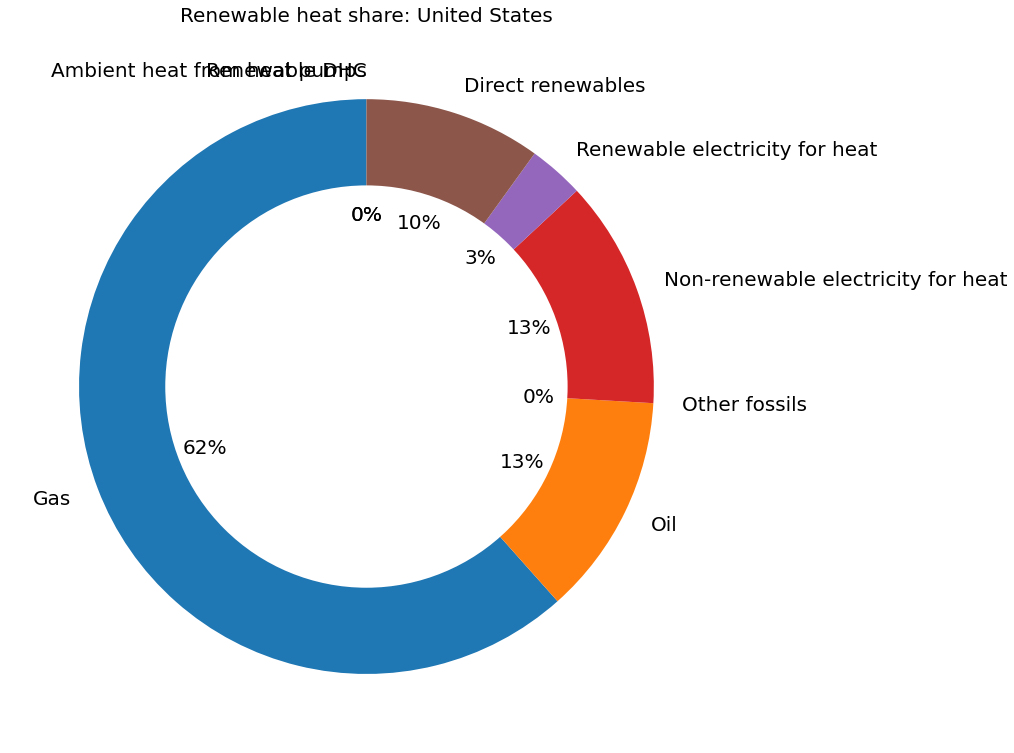

In [32]:
for country in df_2.index:
    plt.figure(figsize=(14,14))
    colors = sns.color_palette("tab10")
    plt.pie(df_2.loc[country], labels=labels_2, colors=colors, startangle=90, autopct='%.0f%%', textprops={'fontsize': 20})
    plt.title(f'Renewable heat share: {country}', fontdict={'fontsize': 20})
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.savefig(f"Exported/{country}_figure_2")
    plt.show()